**Section 1: Initial EDA with Pandas**

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Loading dataset

df = pd.read_csv('/content/merged_data - Copy.csv')
#  Display the first few rows
df.head()

review_id  product_id  \
0  R39OWWUSAGMH3E  B07PXGQC1Q   
1   R9GYL2L2Y8YBG  B07PXGQC1Q   
2  R2QGEC3WRQRMLX  B07PXGQC1Q   
3  R1F236Q566CSRQ  B07PXGQC1Q   
4  R3NZ2BURXAQ8U0  B07PXGQC1Q   

                                               title                author  \
0  5.0 out of 5 stars ⁦I recently purchased the A...           SUGU_SWEETY   
1               5.0 out of 5 stars worked perfectly!               Chandan   
2                  5.0 out of 5 stars Very practical                 renee   
3  5.0 out of 5 stars **⭐️⭐️⭐️⭐️⭐️ Best Wireless ...  Christopher Domenici   
4  5.0 out of 5 stars Amazing Upgrade – Worth Eve...          Casey Kimbro   

   rating                                            content  \
0       5  To begin with, these are quite expensive headp...   
1       5  I recently got the Apple AirPods (2nd Generati...   
2       5  Taking the Apple AirPods at face value, they'r...   
3       5  I recently purchased the Apple AirPods (2nd Ge...   
4       5  I recently upgraded to the AirPods Pro 2, and ...   

                                        timestamp  \
0    Reviewed in the United States August 7, 2024   
1   Reviewed in the United States August 30, 2024   
2  Reviewed in the United States October 19, 2023   
3     Reviewed in the United States July 24, 2024   
4    Reviewed in the United States August 6, 2024   

                     profile_id  is_verified  helpful_count  \
0  AFWY5OFECUVT7RCWYC27IBDZYBVQ         True             73   
1  AFJKMOBVB757I74XTYRABEIYH7RQ         True              8   
2  AEYO6M357PGA7I2MHHB2FQ5FSDEA         True            263   
3  AGRIDBGN53EGTU3SUFCAVHTUS2XA         True             52   
4  AEUFIS7O7QEES5D5Q2A6EQFEG4KA         True              9   

        product_attributes  
0  Set: Without AppleCare+  
1  Set: Without AppleCare+  
2  Set: Without AppleCare+  
3  Set: Without AppleCare+  
4  Set: Without AppleCare+

In [ ]:
#  Provide descriptive statistics (mean, median, mode, variance, standard deviation).
df.describe()


rating  helpful_count
count  1000.000000    1000.000000
mean      4.646000       8.512000
std       0.531946      61.527811
min       2.000000       0.000000
25%       4.000000       0.000000
50%       5.000000       0.000000
75%       5.000000       1.000000
max       5.000000    1159.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           1000 non-null   object
 1   product_id          1000 non-null   object
 2   title               1000 non-null   object
 3   author              1000 non-null   object
 4   rating              1000 non-null   int64 
 5   content             999 non-null    object
 6   timestamp           1000 non-null   object
 7   profile_id          1000 non-null   object
 8   is_verified         1000 non-null   bool  
 9   helpful_count       1000 non-null   int64 
 10  product_attributes  999 non-null    object
dtypes: bool(1), int64(2), object(8)
memory usage: 79.2+ KB


In [ ]:
df.product_id.value_counts()

product_id
B07PXGQC1Q    100
B0BQPNMXQV    100
B00OUX6U6G    100
B0BTYCRJSS    100
B09LYF2ST7    100
B085296FLT    100
B0746RBK2M    100
B07HH1QSLB    100
B09FLNSYDZ    100
B09FT58QQP    100
Name: count, dtype: int64

In [ ]:
df.rename(columns={'title': 'review'}, inplace=True)
df['product_name'] = df['product_id'].map({
    'B07PXGQC1Q': 'Apple AirPods (2nd Generation)',
    'B00OUX6U6G': 'Sony ZX Series Wired',
    'B0BTYCRJSS': 'Soundcore by Anker P20i',
    'B09LYF2ST7': 'BERIBES Bluetooth Headphones',
    'B0746RBK2M': 'Kids Headphones',
    'B085296FLT': 'Beats Studio3',
    'B09FLNSYDZ': 'bmani Wireless Earbuds',
    'B09FT58QQP': 'TOZO A1',
    'B0BQPNMXQV': 'JBL Vibe Beam',
    'B07HH1QSLB': 'Amazon Basics'
}).fillna('Other')
df.head()

review_id  product_id  \
0  R39OWWUSAGMH3E  B07PXGQC1Q   
1   R9GYL2L2Y8YBG  B07PXGQC1Q   
2  R2QGEC3WRQRMLX  B07PXGQC1Q   
3  R1F236Q566CSRQ  B07PXGQC1Q   
4  R3NZ2BURXAQ8U0  B07PXGQC1Q   

                                              review                author  \
0  5.0 out of 5 stars ⁦I recently purchased the A...           SUGU_SWEETY   
1               5.0 out of 5 stars worked perfectly!               Chandan   
2                  5.0 out of 5 stars Very practical                 renee   
3  5.0 out of 5 stars **⭐️⭐️⭐️⭐️⭐️ Best Wireless ...  Christopher Domenici   
4  5.0 out of 5 stars Amazing Upgrade – Worth Eve...          Casey Kimbro   

   rating                                            content  \
0       5  To begin with, these are quite expensive headp...   
1       5  I recently got the Apple AirPods (2nd Generati...   
2       5  Taking the Apple AirPods at face value, they'r...   
3       5  I recently purchased the Apple AirPods (2nd Ge...   
4       5  I recently upgraded to the AirPods Pro 2, and ...   

                                        timestamp  \
0    Reviewed in the United States August 7, 2024   
1   Reviewed in the United States August 30, 2024   
2  Reviewed in the United States October 19, 2023   
3     Reviewed in the United States July 24, 2024   
4    Reviewed in the United States August 6, 2024   

                     profile_id  is_verified  helpful_count  \
0  AFWY5OFECUVT7RCWYC27IBDZYBVQ         True             73   
1  AFJKMOBVB757I74XTYRABEIYH7RQ         True              8   
2  AEYO6M357PGA7I2MHHB2FQ5FSDEA         True            263   
3  AGRIDBGN53EGTU3SUFCAVHTUS2XA         True             52   
4  AEUFIS7O7QEES5D5Q2A6EQFEG4KA         True              9   

        product_attributes                    product_name  
0  Set: Without AppleCare+  Apple AirPods (2nd Generation)  
1  Set: Without AppleCare+  Apple AirPods (2nd Generation)  
2  Set: Without AppleCare+  Apple AirPods (2nd Generation)  
3  Set: Without AppleCare+  Apple AirPods (2nd Generation)  
4  Set: Without AppleCare+  Apple AirPods (2nd Generation)

In [ ]:
# Provide descriptive statistics (mean, median, mode, variance, standard deviation).
mean_value = df['rating'].mean()
median_value = df['rating'].median()
mode_value = df['rating'].mode()[0]
variance_value = df['rating'].var()
std_value = df['rating'].std()

print('Mean:',mean_value)
print('Median:',median_value)
print('Mode:',mode_value)
print('Variance:',variance_value)
print('Standart Deviation:',std_value)

Mean: 4.646
Median: 5.0
Mode: 5
Variance: 0.28296696696696694
Standart Deviation: 0.531946394824673


In [ ]:
# Identify and handle missing values.
df.isnull().sum()

review_id             0
product_id            0
review                0
author                0
rating                0
content               1
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    1
product_name          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

review_id             0
product_id            0
review                0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
product_name          0
dtype: int64

We don't have missind values as we handled them already.

In [ ]:
#  Check for duplicates and remove them if necessary.
df.duplicated().sum()

0

**Section2: Data Visualization**

Create various plots (histograms, box plots, scatter plots, heatmaps) to visualize the data distribution and relationships.

Insights: This bar chart will show you which Beats products have the most reviews. You can see which models are most popular among customers.

Visualizing the distribution of ratings using a count plot.

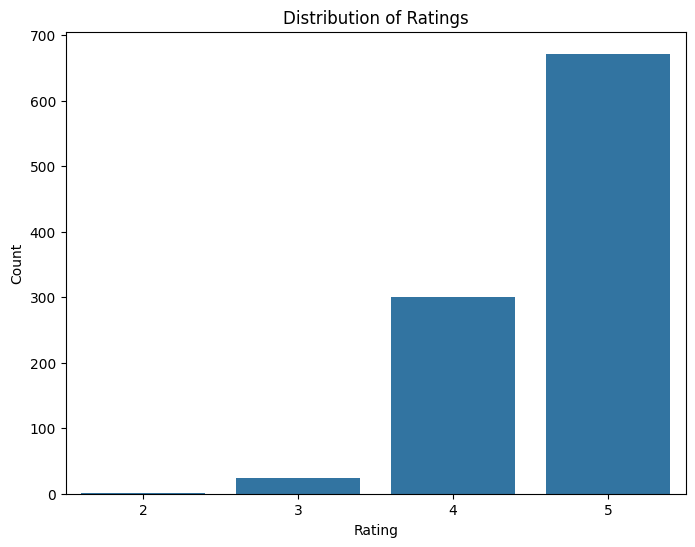

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

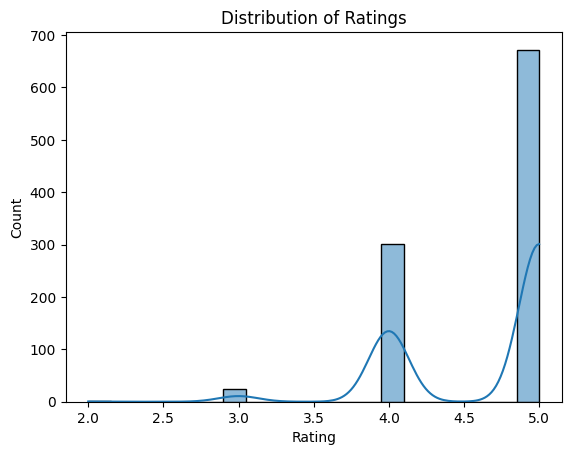

In [ ]:
sns.histplot(data=df, x='rating', bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

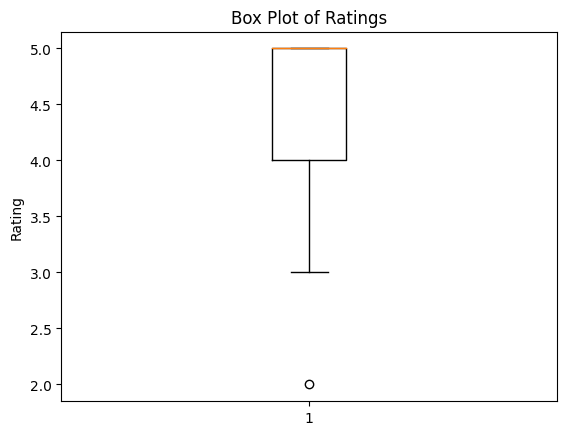

In [ ]:
plt.boxplot(df['rating'])
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()

In [ ]:
df.rating.value_counts()

rating
5    672
4    301
3     24
2      1
Name: count, dtype: int64

As we have only one two star rating, the boxplot above shows it like outlier. However, we consider it like normal anomaly and we will keep the rating count as it is.

Let's explore which product score 2 start.

In [ ]:
df[df['rating'] == 2]

review_id  product_id  \
508  R1H100TYFQZJLK  B085296FLT   

                                            review                 author  \
508  2.0 out of 5 stars Please Read Before Buying.  O.Winnie Mittelberger   

     rating                                            content  \
508       2  My rating falls close to a 1.5 for multiple re...   

                                           timestamp  \
508  Reviewed in the United States December 29, 2022   

                       profile_id  is_verified  helpful_count  \
508  AH46ZHN22ZKGHWOM3UMMORBATP2Q         True            929   

                 product_attributes   product_name  
508  Color: Matte BlackSet: Studio3  Beats Studio3

In [ ]:
df.iloc[507].content

'My rating falls close to a 1.5 for multiple reasons:For starters, this headphone is marketed and sold as an ANC (Active Noise Cancelling), Over-Ear headphone. Typically, headphones like these are targeting people who buy them for travel (i.e. a plane ride) but also are helpful in any public space. Please keep this in mind for the rest of my comment. From the inside out, these headphones cannot hold their own with any other pair in the price range.I purchased my pair when they were 57% off, bringing the total from $350 to $160 (including tax), but I cannot in good conscious recommend them for either price bracket. Comparing them to the most common headphone in the $350 bracket, the Sony XM4 (and newly the XM5) are a essentially the opposite side of the spectrum when it comes to all qualities. They clearly lose the battle for acceptable headphones to buy for $350, but some could make a case for the discounted price.Everything I found wrong with the Beats (most to least important):- Soun

In [ ]:
df.iloc[507].review

'2.0 out of 5 stars Please Read Before Buying.'


The 2 start rating product is Beats Studio3 Wireless Noise Cancelling Over-Ear Headphones.

Link: https://www.amazon.com/Beats-Studio3-Wireless-Over%E2%80%91Ear-Headphones/dp/B085296FLT

In [ ]:
df.groupby('product_name')['rating'].value_counts()

product_name                    rating
Amazon Basics                   5         58
                                4         30
                                3         11
Apple AirPods (2nd Generation)  5         78
                                4         21
                                3          1
BERIBES Bluetooth Headphones    5         60
                                4         40
Beats Studio3                   5         76
                                4         19
                                3          4
                                2          1
JBL Vibe Beam                   5         67
                                4         31
                                3          1
Kids Headphones                 5         77
                                4         18
                                3          5
Sony ZX Series Wired            5         67
                                4         32
                                3          1
Soundcore by Anker P20i         5         65
                                4         34
                                3          1
TOZO A1                         5         68
                                4         32
bmani Wireless Earbuds          5         56
                                4         44
Name: count, dtype: int64

In [ ]:
df.groupby('product_name')['rating'].value_counts().sort_values(ascending=False)


product_name                    rating
Apple AirPods (2nd Generation)  5         78
Kids Headphones                 5         77
Beats Studio3                   5         76
TOZO A1                         5         68
JBL Vibe Beam                   5         67
Sony ZX Series Wired            5         67
Soundcore by Anker P20i         5         65
BERIBES Bluetooth Headphones    5         60
Amazon Basics                   5         58
bmani Wireless Earbuds          5         56
                                4         44
BERIBES Bluetooth Headphones    4         40
Soundcore by Anker P20i         4         34
Sony ZX Series Wired            4         32
TOZO A1                         4         32
JBL Vibe Beam                   4         31
Amazon Basics                   4         30
Apple AirPods (2nd Generation)  4         21
Beats Studio3                   4         19
Kids Headphones                 4         18
Amazon Basics                   3         11
Kids Headphones                 3          5
Beats Studio3                   3          4
                                2          1
Soundcore by Anker P20i         3          1
Apple AirPods (2nd Generation)  3          1
Sony ZX Series Wired            3          1
JBL Vibe Beam                   3          1
Name: count, dtype: int64

From the above table we can see that the highest rated headphone is Apple AirPods (2nd Generation) with 78 counts of 5 stars, followed by Kids Headphones, and our brand is third.

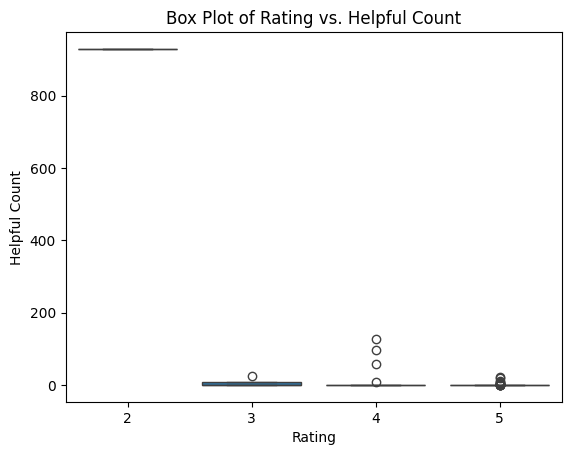

In [ ]:
sns.boxplot(data=df[df['product_id'] =='B085296FLT'], x='rating', y='helpful_count')
plt.title('Box Plot of Rating vs. Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()

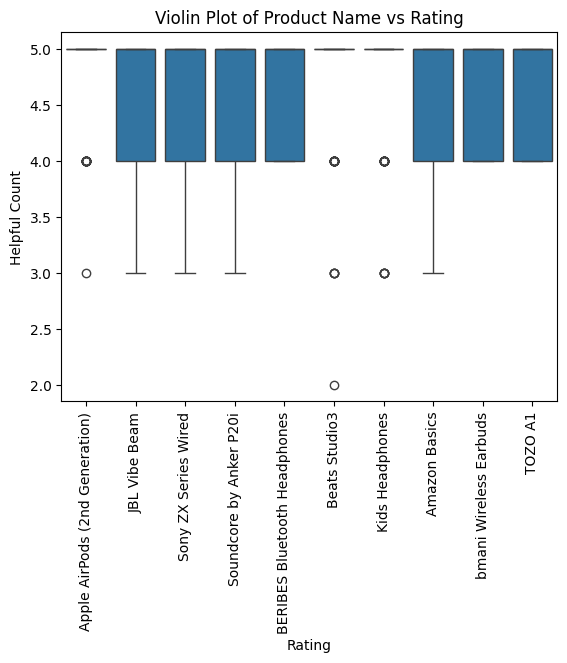

In [ ]:
sns.boxplot(x=df['product_name'], y=df.rating, orient='vertical')
plt.title('Violin Plot of Product Name vs Rating')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.show()

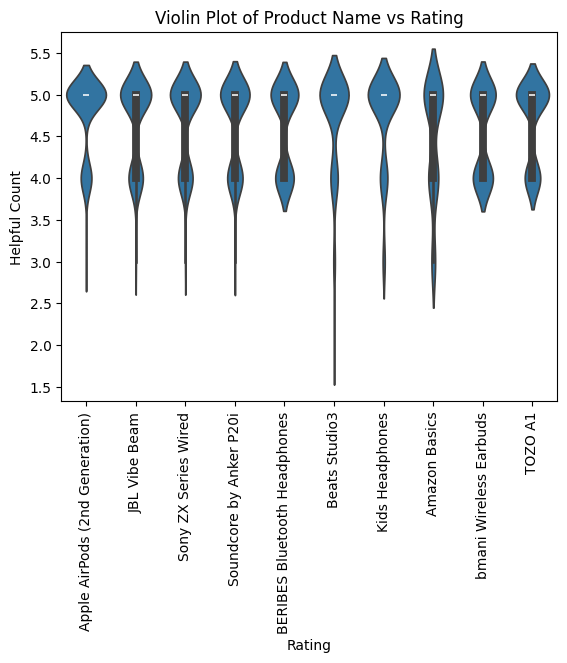

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x=df['product_name'], y=df.rating, orient='vertical')
plt.title('Violin Plot of Product Name vs Rating')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees
plt.show()

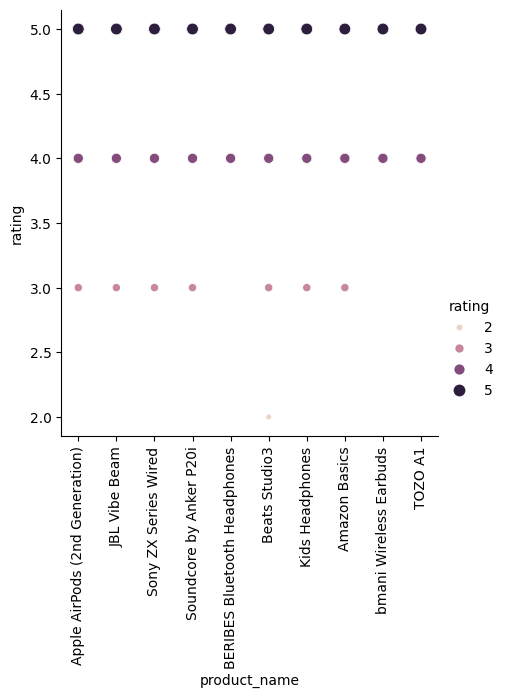

In [ ]:
# bubble plot
sns.relplot(data=df, x='product_name', y='rating', kind="scatter", size="rating", hue="rating"); # Remove orient parameter
plt.xticks(rotation=90)  # Rotate x-axis tick labels by 90 degrees for better readability
plt.show()

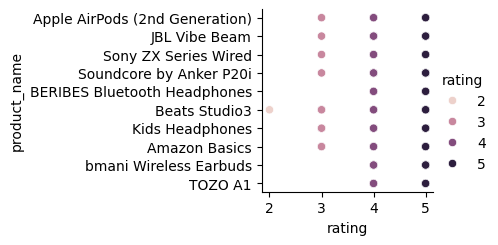

In [ ]:
sns.pairplot(df, x_vars=['rating'], y_vars=['product_name'], hue='rating', height=2.5);

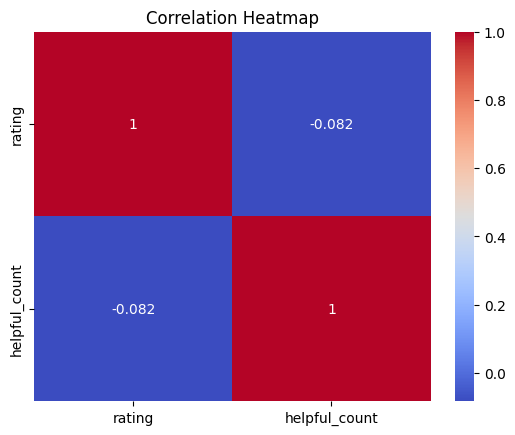

In [ ]:
df_copy = df.copy()

# Convert 'rating' column to numeric type if it's not already
df_copy['rating'] = pd.to_numeric(df_copy['rating'])

# Select only numerical columns for correlation analysis
numerical_df = df_copy.select_dtypes(include=['number'])

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Section 3: Correlation Analysis**

Calculate the correlation matrix

In [ ]:
from scipy.stats import pearsonr

# Calculate correlation coefficient using scipy (excluding 'review_id')
r, p_value = pearsonr(df_copy['rating'], df_copy['helpful_count'])
print("Correlation Coefficient (r):", r)
print("p-value:", p_value)

Correlation Coefficient (r): -0.08223580928553162
p-value: 0.009347663298719035


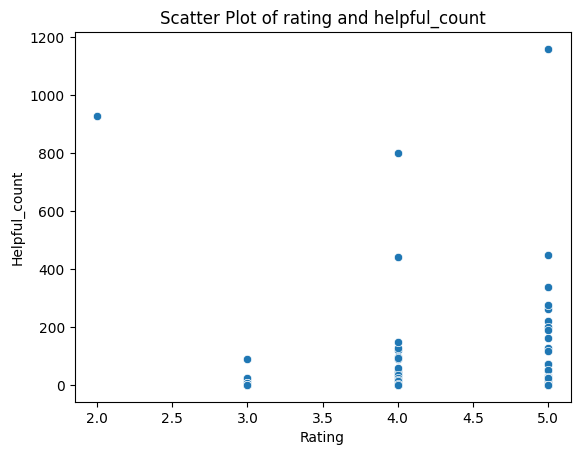

In [ ]:
# Scatter plot
sns.scatterplot(x=df['rating'], y=df['helpful_count'])
plt.title('Scatter Plot of rating and helpful_count')
plt.xlabel('Rating')
plt.ylabel('Helpful_count')
plt.show()

2. Average Sentiment by Product:

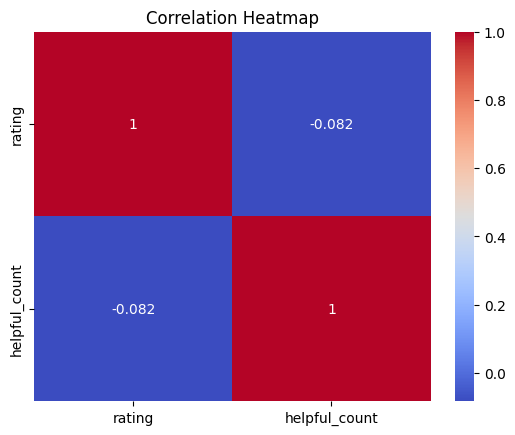

In [ ]:
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Section 4: Sentiment Analysis using TextBlob**

 Perform sentiment analysis on the text reviews


Now, let's get into some visualizations and insights:

1. Product Popularity:

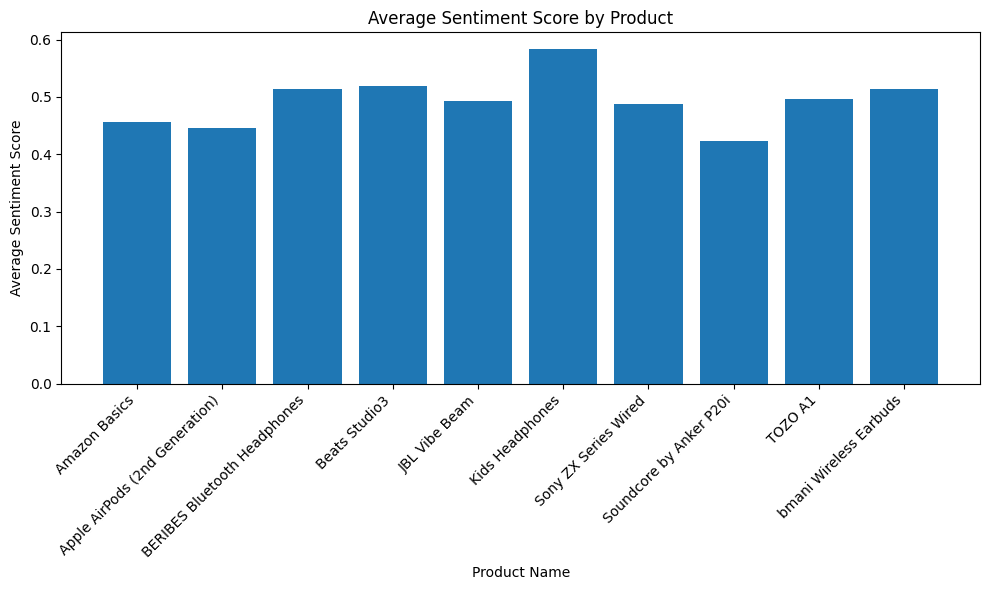

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob

def analyze_sentiment(review_text):
    analysis = TextBlob(review_text)
    return analysis.sentiment.polarity

# Calculate average sentiment for each product
product_sentiments = df.groupby('product_name')['review'].apply(lambda reviews: analyze_sentiment(" ".join(reviews.astype(str)))).groupby('product_name').mean()

plt.figure(figsize=(10, 6))
plt.bar(product_sentiments.index, product_sentiments.values)
plt.title('Average Sentiment Score by Product')
plt.xlabel('Product Name')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Star Rating Distribution of "Avarage Sentiment Score By Product" visualization is to compare the distribution of star ratings for different brands.

Insights: This bar chart displays the average sentiment score for each product. You can see which models are receiving the most positive or negative reviews. Here could see that Kids Headphones are ahead that other brands.

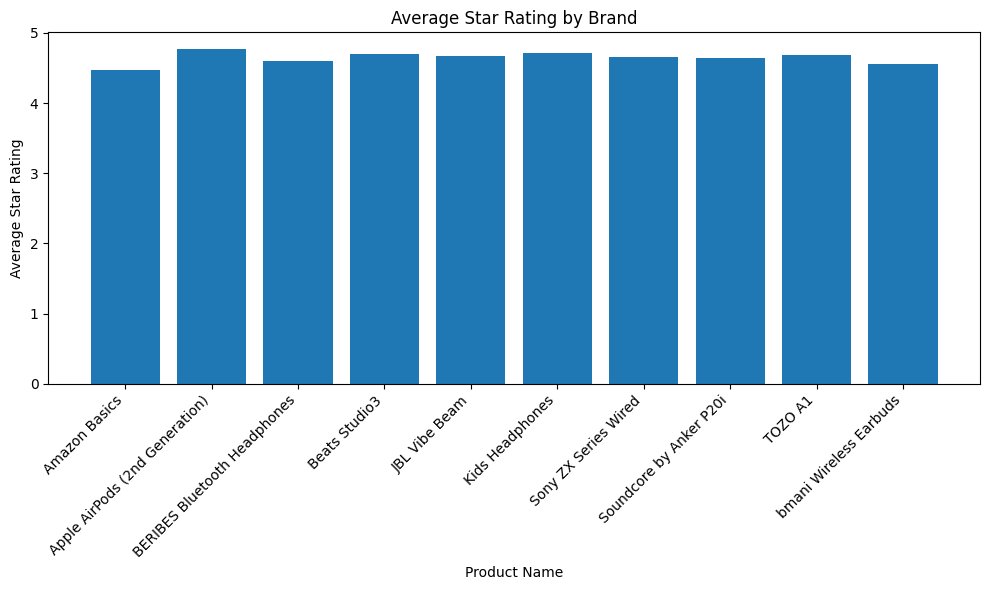

In [ ]:
import matplotlib.pyplot as plt

# Group reviews by product and calculate average star rating
avg_stars_by_product = df.groupby('product_name')['rating'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_stars_by_product.index, avg_stars_by_product.values)
plt.title('Average Star Rating by Brand')
plt.xlabel('Product Name')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insights: This chart reveals which brands consistently receive higher or lower star ratings. It provides a quick overview of brand performance based on customer satisfaction

In [ ]:
import nltk
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Word cloud of review text
from wordcloud import WordCloud
all_reviews = ' '.join(df['content'])
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

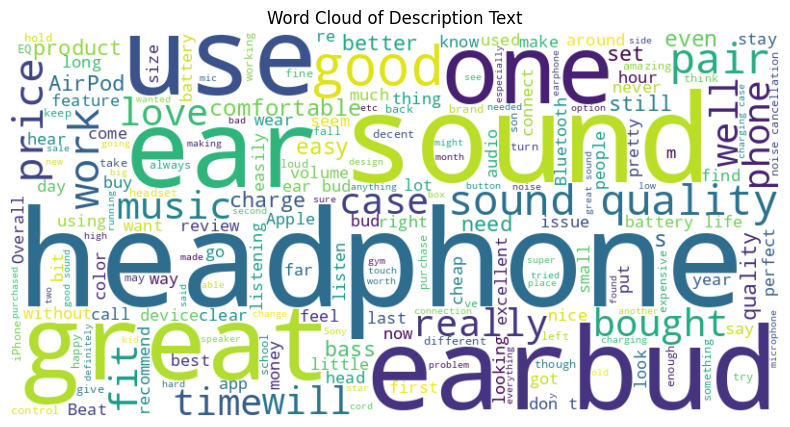

In [ ]:
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Text')
plt.show()

From this word cloud we can see bigger the words like earbud, headphone, great, use, good, ear, sound. The size of each word in the cloud corresponds to its frequency in the text. These word clouds are simple and effective for visualizing the most common terms in a dataset.

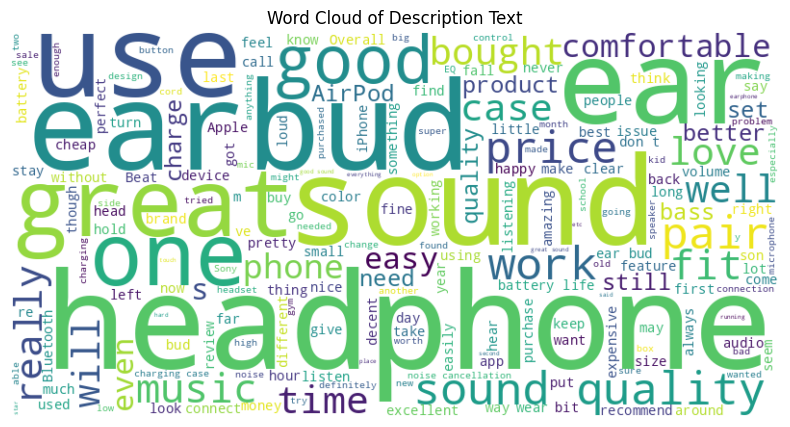

In [ ]:
b = df[(df['product_name'] == 'Beats Studio3') & (df['content'].notna())]
# Use parentheses to group conditions and .notna() to filter for non-empty content
beats_reviews = ' '.join(b['content']) # Join the 'content' of the filtered DataFrame

# Generate word cloud of the Beats product
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display word cloud of the Beats product
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description Text')
plt.show()

As we can see that main words in our item is great, good, use, sound, earbud, ear, which indicates that the product is highly rated and many people talk about how it sounds.

Classify the reviews into positive, negative, and neutral sentiments. Aggregate the sentiment scores to assess overall consumer sentiment.

In [ ]:
def sentiment_analysis_summary(df, text_col):
    """
    Perform sentiment analysis on text data and return the counts of positive, negative, and neutral reviews.

    Parameters:
    df (DataFrame): The input DataFrame.
    text_col (str): The name of the column containing text data.

    Returns:
    dict: A dictionary with counts of positive, negative, and neutral reviews.
    """
    # Initialize the sentiment analyzer

    sid = SentimentIntensityAnalyzer()
    # Convert the column to string type before applying TextBlob
    df[text_col] = df[text_col].astype(str)
    df['sentiment'] = df[text_col].apply(lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else ('negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral'))
    sentiment_counts = df['sentiment'].value_counts().to_dict()
    return sentiment_counts

In [ ]:
# Test to check if code is correct
sentiment_analysis_summary(df_copy, "review")

{'positive': 689, 'neutral': 261, 'negative': 48}

In [ ]:
sentiment_analysis_summary(df_copy, "content")

{'positive': 910, 'neutral': 51, 'negative': 37}

In [ ]:
# Calculate the sentiment counts
sentiment_counts = sentiment_analysis_summary(df_copy, "content")

# Calculate the total number of reviews
total_reviews = len(df_copy)

# Calculate the proportions for each sentiment
sentiment_proportions = {sentiment: count / total_reviews for sentiment, count in sentiment_counts.items()}

# Print the proportions
print('Sentiment Analysis Summary in proportions:', sentiment_proportions)

Sentiment Analysis Summary in proportions: {'positive': 0.9118236472945892, 'neutral': 0.05110220440881764, 'negative': 0.03707414829659319}


Feature-Sentiment Heatmap:

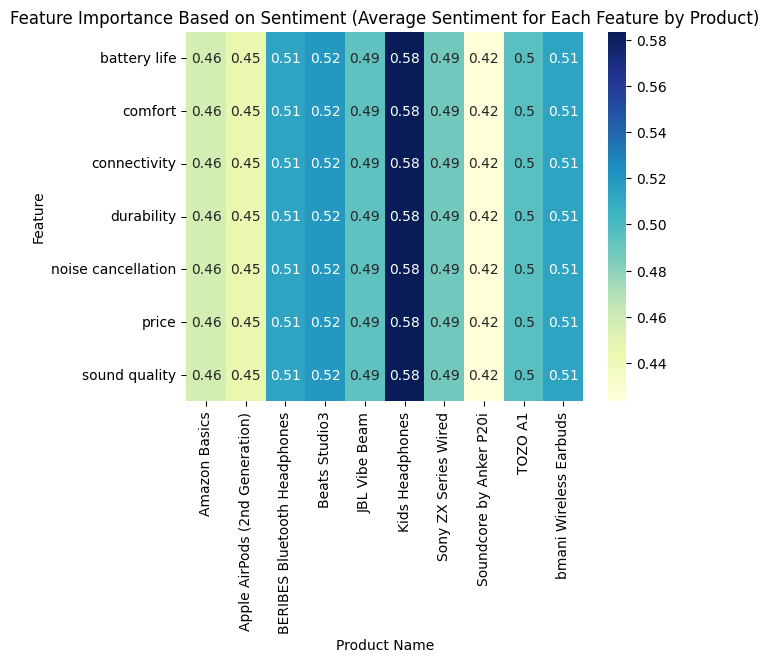

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a 'feature' column in your DataFrame (you'll need to add this from your data)
features = ['sound quality', 'noise cancellation', 'comfort', 'battery life', 'connectivity', 'durability', 'price']

# Create a list of features and their associated sentiments
feature_sentiments = []
for feature in features:
    for product_name in df['product_name'].unique():
        product_reviews = df[df['product_name'] == product_name]['review'].tolist()
        sentiment = analyze_sentiment(" ".join(product_reviews))
        feature_sentiments.append({'feature': feature, 'product_name': product_name, 'sentiment': sentiment})

# Create a DataFrame from the feature-sentiment data
feature_df = pd.DataFrame(feature_sentiments)

# Create a heatmap to visualize feature importance based on sentiment
sns.heatmap(pd.crosstab(feature_df["feature"], feature_df["product_name"], values=feature_df["sentiment"], aggfunc="mean"), annot=True, cmap="YlGnBu")
plt.title("Feature Importance Based on Sentiment (Average Sentiment for Each Feature by Product)")
plt.xlabel("Product Name")
plt.ylabel("Feature")
plt.show()

Insights: This heatmap will show you how different features relate to customer sentiment for each product. It can help you identify strengths and weaknesses of specific features across the product line.

5. Customer Feedback Analysis with NLTK:

NLTK Tools:

FreqDist: Analyze the frequency of words used in reviews for each brand to find key topics and insights.

SentimentIntensityAnalyzer: Use VADER (Valence Aware Dictionary for Sentiment Reasoning) to assess the emotional intensity of reviews (positive, negative, anger, joy, sadness, etc.).

Topic Modeling (LDA): Discover the main topics discussed in reviews for each brand, revealing key themes and customer concerns.

***FreqDist:***

In [ ]:
import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords')  # Download stopwords if not already downloaded
# Download the 'punkt' dataset
nltk.download('punkt')  # Download punkt if not already downloaded

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_word_frequencies(reviews):
    words = []
    for review in reviews:
        words.extend(nltk.word_tokenize(review))
    word_frequencies = nltk.FreqDist(word.lower() for word in words if word.lower() not in stop_words)
    return word_frequencies

for brand in df['product_name'].unique():
    product_reviews = df[df['product_name'] == brand]['review'].tolist()
    word_frequencies = get_word_frequencies(product_reviews)
    print(f"Most frequent words for {brand}:")
    print(word_frequencies.most_common(10))

Most frequent words for Apple AirPods (2nd Generation):
[('5', 100), ('stars', 100), ('5.0', 78), ('!', 28), ('4.0', 21), ('airpods', 14), ('great', 12), ('.', 12), ('apple', 9), ('good', 9)]
Most frequent words for JBL Vibe Beam:
[('5', 99), ('stars', 99), ('5.0', 67), ('4.0', 31), ('great', 27), ('sound', 22), ('good', 16), ('quality', 13), ('!', 13), ('price', 12)]
Most frequent words for Sony ZX Series Wired:
[('5', 100), ('stars', 100), ('5.0', 67), ('4.0', 32), ('headphones', 19), ('great', 16), ('good', 16), ('.', 15), ('!', 13), ('sound', 12)]
Most frequent words for Soundcore by Anker P20i:
[('5', 100), ('stars', 100), ('5.0', 65), ('!', 37), ('4.0', 34), ('great', 25), ('.', 20), ('price', 16), ('earbuds', 12), ('good', 11)]
Most frequent words for BERIBES Bluetooth Headphones:
[('5', 100), ('stars', 100), ('5.0', 60), ('4.0', 40), ('!', 35), ('great', 22), ('headphones', 19), (',', 15), ('price', 13), ('good', 13)]
Most frequent words for Beats Studio3:
[('5', 100), ('stars'

***SentimentIntensityAnalyzer (VADER):***

In [ ]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

for brand in df['product_name'].unique():
    product_reviews = df[df['product_name'] == brand]['review'].tolist()
    for review in product_reviews:
        sentiment = sia.polarity_scores(review)
        print(f"Review: {review}\nSentiment: {sentiment}\n")

Review: 5.0 out of 5 stars ⁦I recently purchased the Apple AirPods
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Review: 5.0 out of 5 stars worked perfectly!
Sentiment: {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}

Review: 5.0 out of 5 stars Very practical
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Review: 5.0 out of 5 stars **⭐️⭐️⭐️⭐️⭐️ Best Wireless Earbuds I've Ever Owned!**
Sentiment: {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6696}

Review: 5.0 out of 5 stars Amazing Upgrade – Worth Every Penny!
Sentiment: {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.7177}

Review: 4.0 out of 5 stars Great Sound and Convenience with Minor Drawbacks
Sentiment: {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.6249}

Review: 5.0 out of 5 stars Love these
Sentiment: {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

Review: 5.0 out of 5 stars Seamless and High-Quality AirPods
Sentiment: {'neg': 0.0, 'neu': 

Modeling using LDA (Latent Dirichlet Allocation) in Python with NLTK and scikit-learn:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt


nltk.download('wordnet')



[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    """Preprocess text for topic modeling: remove stop words and lemmatize."""
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Load your Beats review data (replace with your actual data)
b = df[(df['product_name'] == 'Beats Studio3') & (df['review'].notna())]
# Use parentheses to group conditions and .notna() to filter for non-empty content
beats_reviews = b['review'].tolist()

# Preprocess the review text
processed_reviews = [preprocess_text(review) for review in beats_reviews] # Use beats_reviews

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Adjust max_features as needed
tfidf_matrix = vectorizer.fit_transform(processed_reviews)

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # Adjust n_components based on your data
lda.fit(tfidf_matrix)

# Print the top words for each topic (with renumbered indices)
for topic_idx in range(lda.components_.shape[0]):  # Iterate through topics
    print(f"Topic {topic_idx + 1}:")  # Add 1 to the topic index for display
    top_words = [vectorizer.get_feature_names_out()[i] for i in lda.components_[topic_idx].argsort()[:-11:-1]]
    print(top_words)

Topic 1:
['increíbles', 'long', 'star', 'beat', 'increible', 'worked', 'comfy', 'son', 'battery', 'life']
Topic 2:
['star', 'good', 'beats', 'quality', 'love', 'price', 'excelente', 'great', 'perfect', 'gift']
Topic 3:
['headphone', 'great', 'star', 'sound', 'awesome', 'best', 'fit', 'works', 'gr8', 'amazing']


**Combining visualizations and NLTK tools**

1. Keyword Frequency Comparison (Bar Chart):

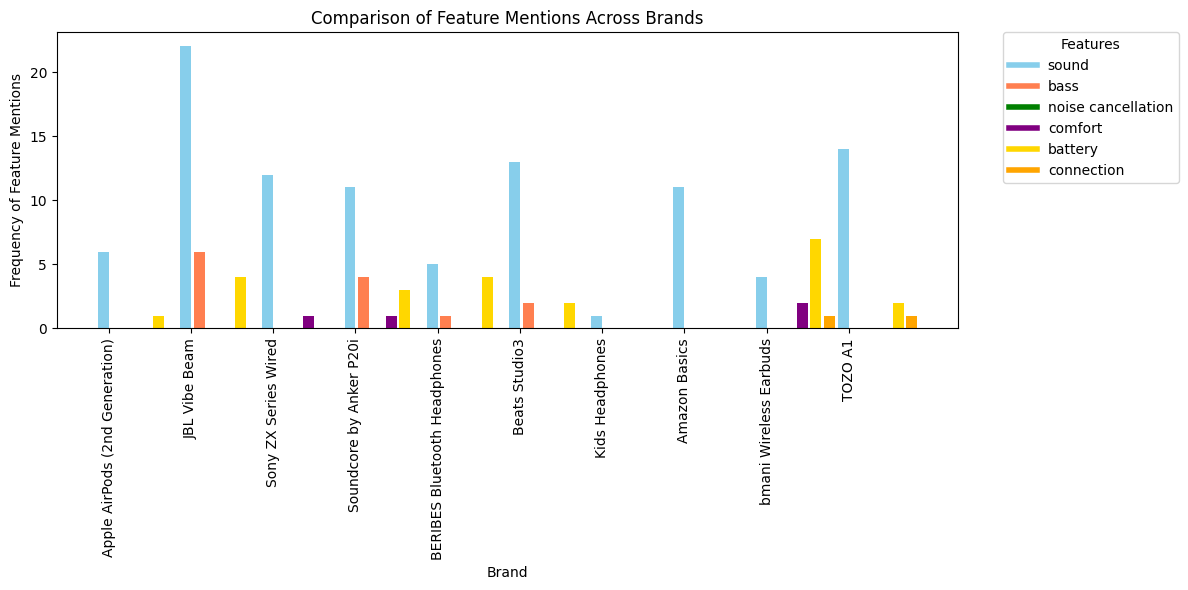

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_word_frequencies(reviews, keywords):
    """Calculate the frequency of specific keywords in a list of reviews."""
    word_counts = {}
    for keyword in keywords:
        word_counts[keyword] = 0
    for review in reviews:
        words = nltk.word_tokenize(review)
        for word in words:
            if word.lower() in keywords:
                word_counts[word.lower()] += 1
    return word_counts

# Example keywords
keywords = ["sound", "bass", 'noise cancellation', "comfort", "battery", "connection"]

# Group reviews by brand
brand_reviews = {}
for brand in df['product_name'].unique():
    brand_reviews[brand] = df[df['product_name'] == brand]['review'].tolist()

# Calculate keyword frequencies for each brand
keyword_frequencies = {}
for brand, reviews in brand_reviews.items():
    keyword_frequencies[brand] = get_word_frequencies(reviews, keywords)

# Create a bar chart to compare keyword frequencies
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'coral', 'green', 'purple', 'gold', 'orange'] # Define colors for each feature

for i, brand in enumerate(keyword_frequencies):
    bar_positions = [i * len(keywords) + j for j in range(len(keywords))]
    bars = plt.bar(bar_positions,
            list(keyword_frequencies[brand].values()),
            label=brand,
            width=0.8,
            color=colors)  # Assign colors to bars


# Create a custom legend for the features with correct colors
custom_legend_patches = [
    plt.Line2D([0], [0], color=color, lw=4, label=keyword)
    for color, keyword in zip(colors, keywords)
]
plt.legend(handles=custom_legend_patches, title="Features", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Position x-axis ticks to center the brand names
plt.xticks([i * len(keywords) + 0.4 for i in range(len(keyword_frequencies))],
           keyword_frequencies.keys(), rotation=90, ha='center')  # Rotate brand names vertically
plt.xlabel('Brand')
plt.ylabel('Frequency of Feature Mentions')  # Clearer y-axis label
plt.title('Comparison of Feature Mentions Across Brands')  # More descriptive title

# Adjust spacing around the x-axis labels
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin

plt.tight_layout()
plt.show()

Insights: This bar chart visualizes the frequency of specific keywords across brands. You can see which brands are discussed most often in relation to specific features (e.g., Beats might have higher frequency of "bass" mentions).


What the Chart Shows:

*Brand Comparison:* The chart compares the frequency of specific product feature mentions across different brands. It shows how often words like "sound," "bass," "noise cancellation," etc., appear in customer reviews for each brand.

*Feature Importance:* The chart helps to understand which features are most frequently discussed for each brand. This can give you a sense of what customers prioritize and focus on when reviewing these products.

*Relative Frequency:* While the chart shows counts that it's more about relative comparisons within each brand. A taller bar for a feature within a brand means it's more frequently mentioned compared to other features for that brand, not necessarily a high overall mention count.

Insights to Extract:

Here's what we can observe from this type of chart:

*Beats Focus:* The "bass" bar for Beats is often very tall, indicating that bass performance is a key discussion point in Beats reviews. This aligns with Beats' marketing and brand reputation for strong bass.

*Bose's Noise Cancellation:* The "noise cancellation" bar for Bose might be significantly higher than other brands. This suggests that Bose is known for its noise cancellation technology, and customers frequently mention it.

Sound Quality is Universal: We are likely see the "sound" bar is generally high across most brands. This reflects that sound quality is a fundamental consideration for most customers.

*Battery Life Importance: The "battery" bar often indicates that customers are concerned with battery life, and it may be important to many brands' customers.

Brand-Specific Strengths: Lookind for areas where a brand has a notably higher frequency of mentions for a specific feature. This suggests they've been successful in building a reputation for that feature.

Areas for Improvement: Conversely, observing brands where the frequency of mentions for a specific feature is lower. This might indicate areas where the brand needs to improve or focus more on marketing efforts.

**2. Sentiment-Enhanced Word Clouds:**

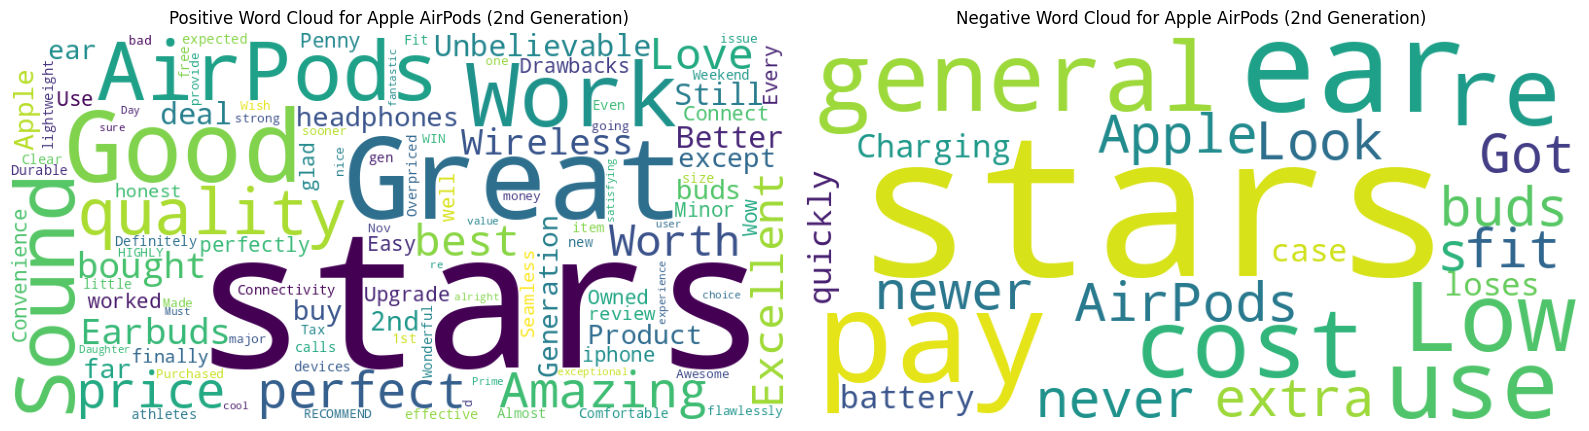

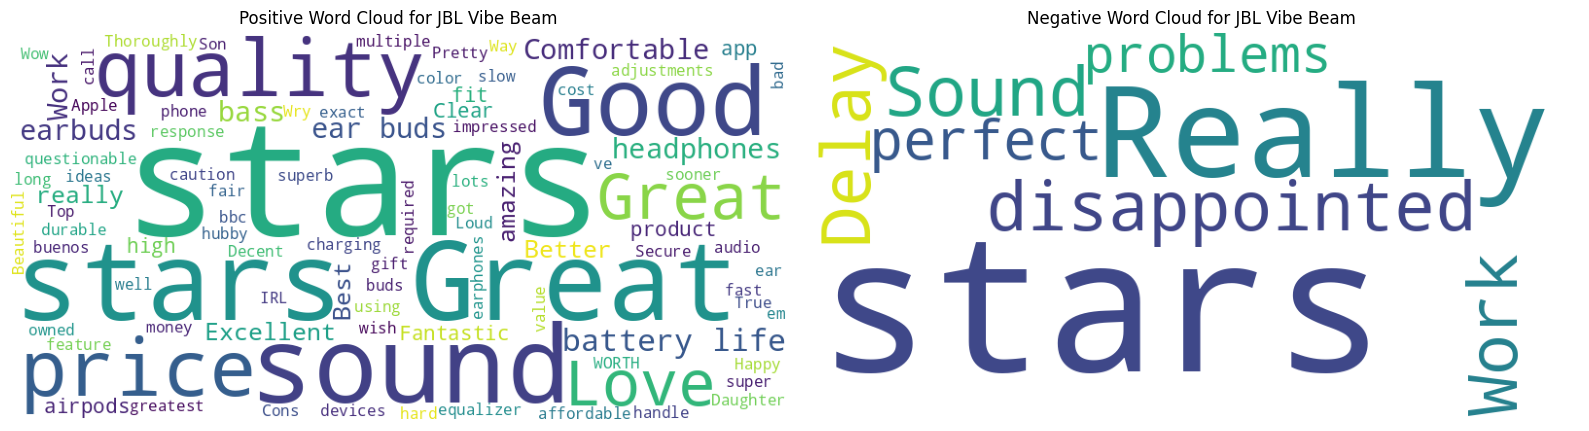

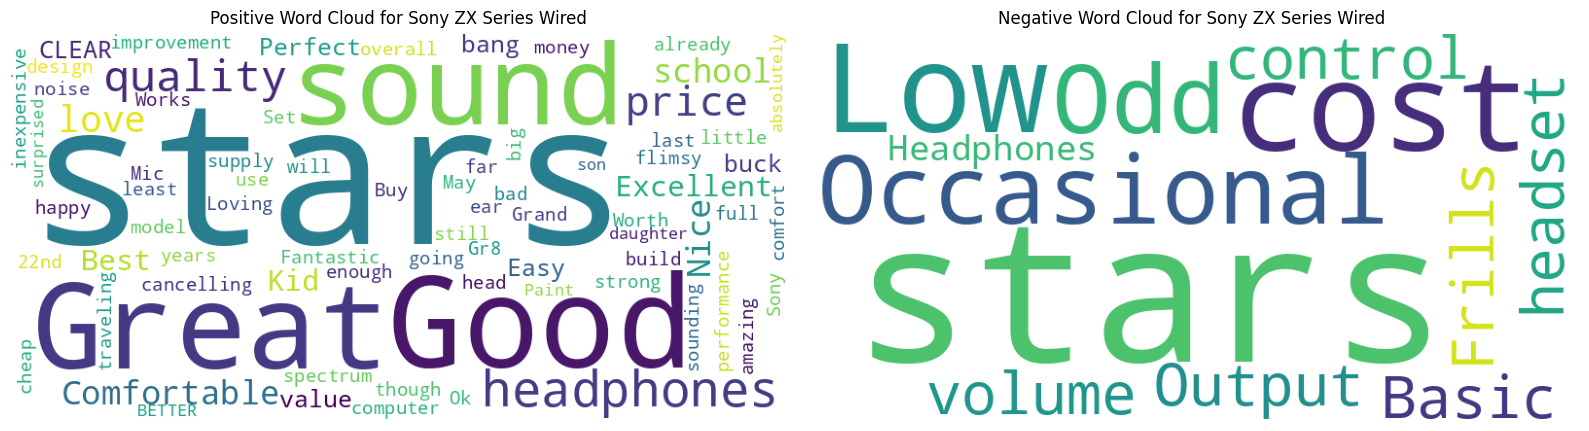

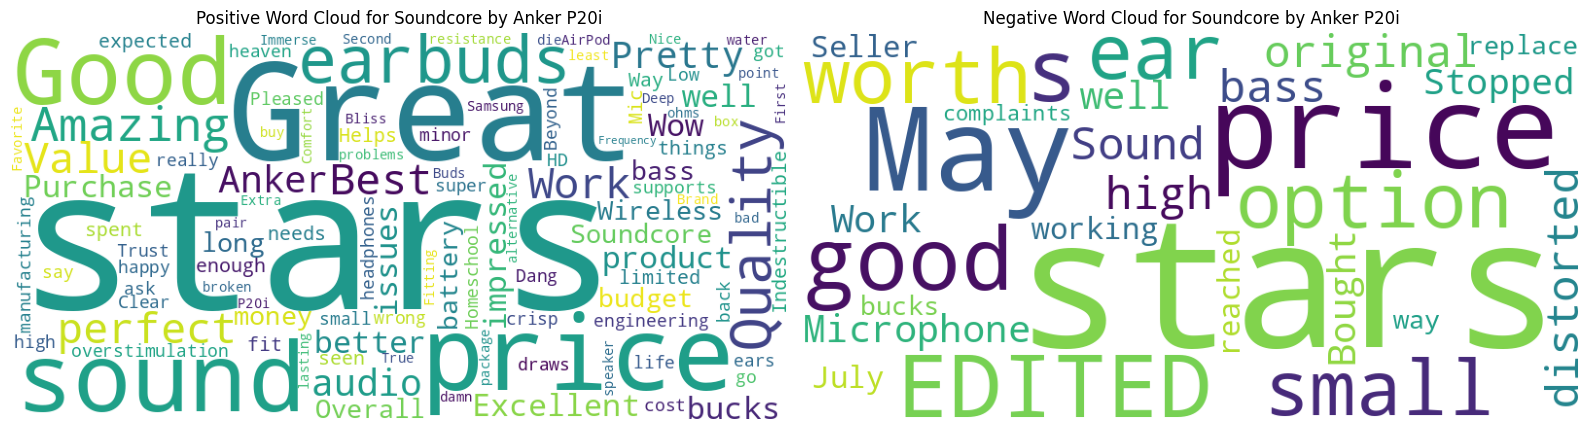

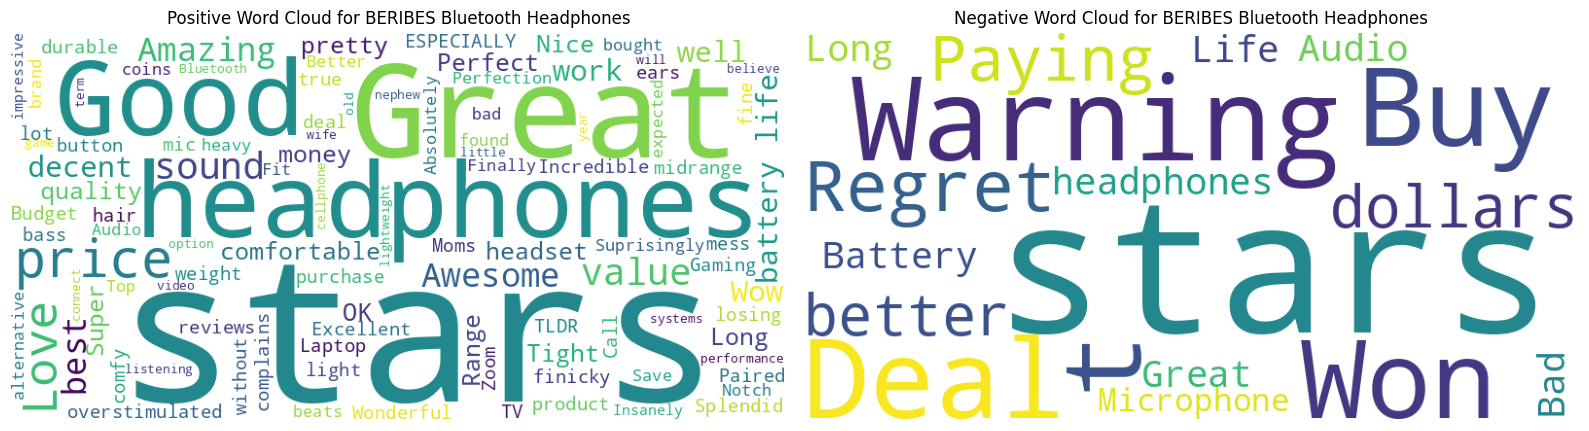

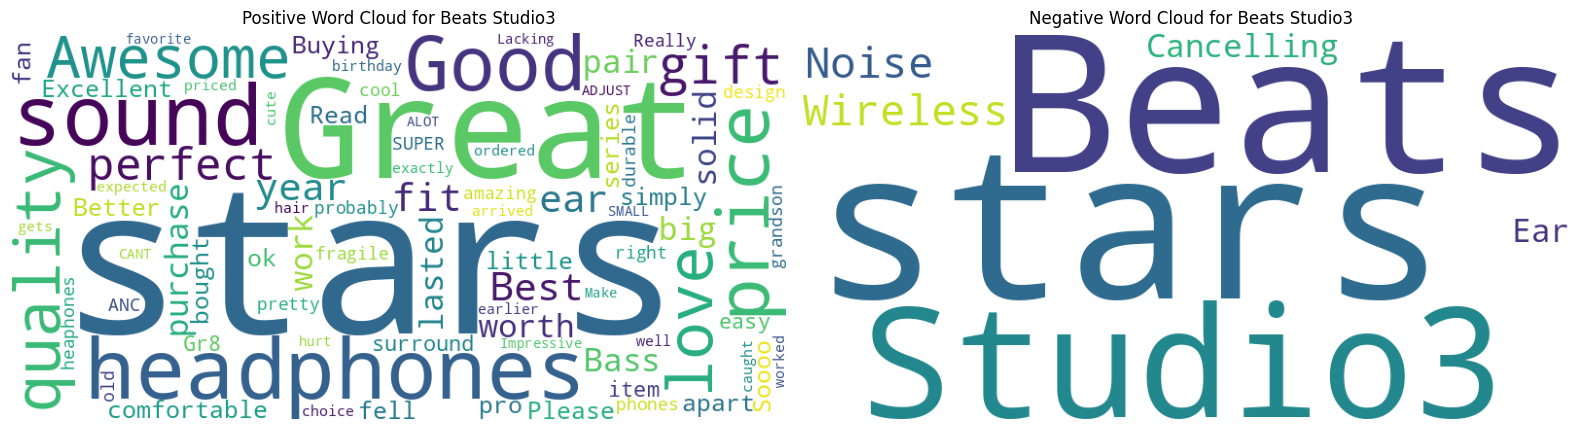

No negative reviews found for Kids Headphones. Skipping negative word cloud.


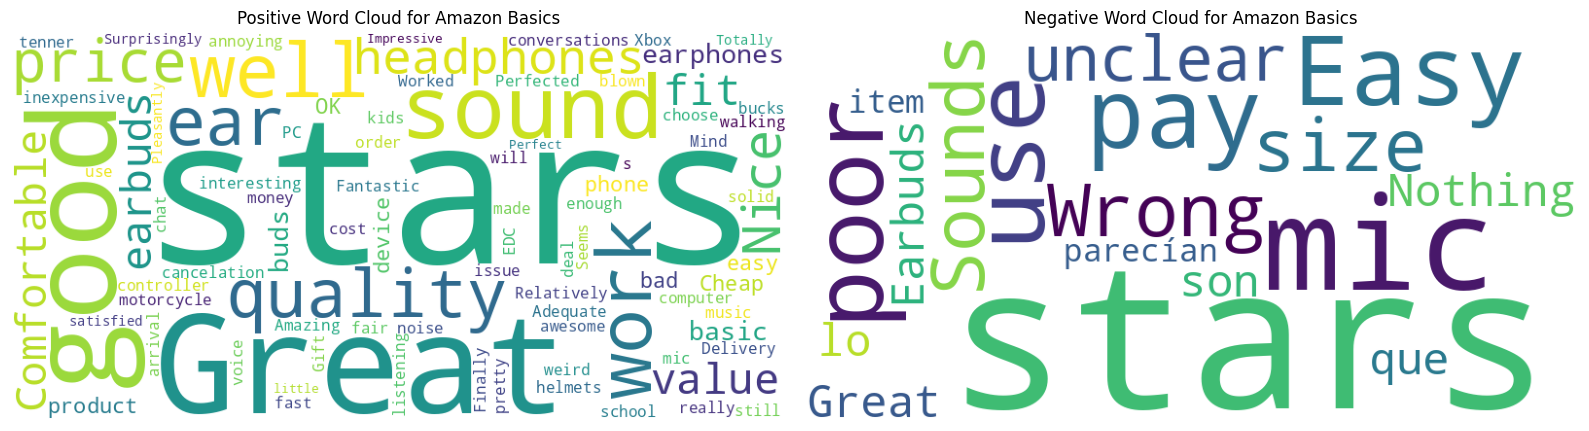

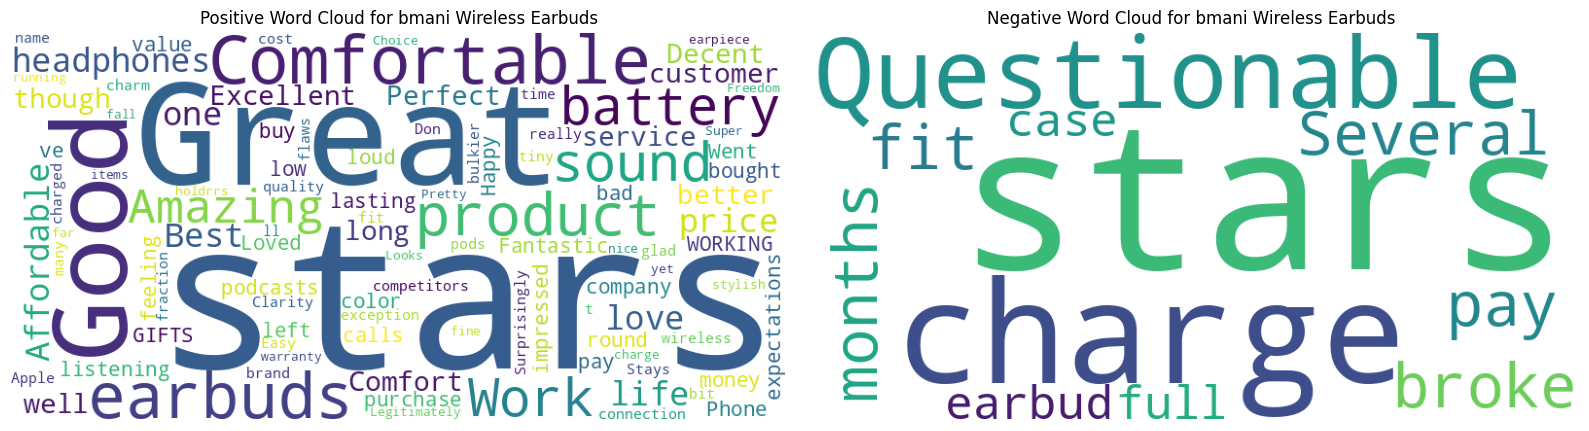

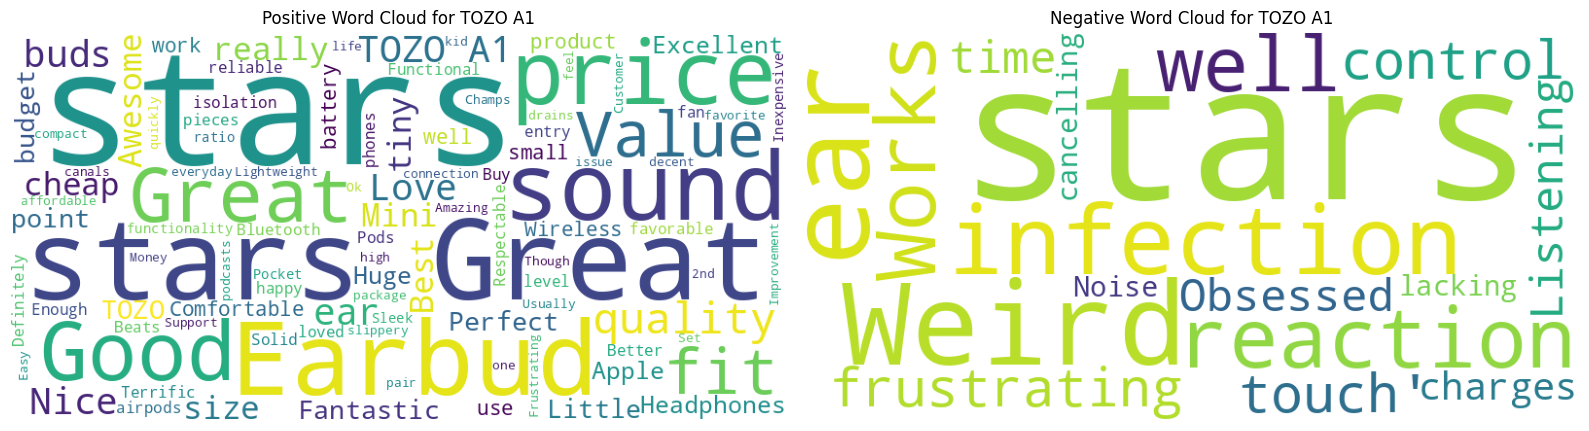

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

for brand in df['product_name'].unique():
    product_reviews = df[df['product_name'] == brand]['review'].tolist()

    # Calculate sentiment scores for each review
    sentiment_scores = {review: sia.polarity_scores(review)['compound'] for review in product_reviews}

    # Create separate word clouds for positive and negative reviews
    positive_reviews = [review for review, score in sentiment_scores.items() if score >= 0.05]  # Adjust threshold as needed
    negative_reviews = [review for review, score in sentiment_scores.items() if score <= -0.05]  # Adjust threshold as needed

    # Check if there are any negative reviews before creating the word cloud
    if negative_reviews:
        # Create word clouds
        positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(positive_reviews))
        negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(negative_reviews))

        # Display the word clouds
        plt.figure(figsize=(16, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(positive_wordcloud)
        plt.title(f"Positive Word Cloud for {brand}")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(negative_wordcloud)
        plt.title(f"Negative Word Cloud for {brand}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print(f"No negative reviews found for {brand}. Skipping negative word cloud.")

Insights: This creates side-by-side word clouds for each brand, one for positive reviews and one for negative reviews. We can see the language associated with positive and negative sentiments, which can help understand what customers like and dislike about each brand.

**3. Topic Modeling with Sentiment Visualization:**

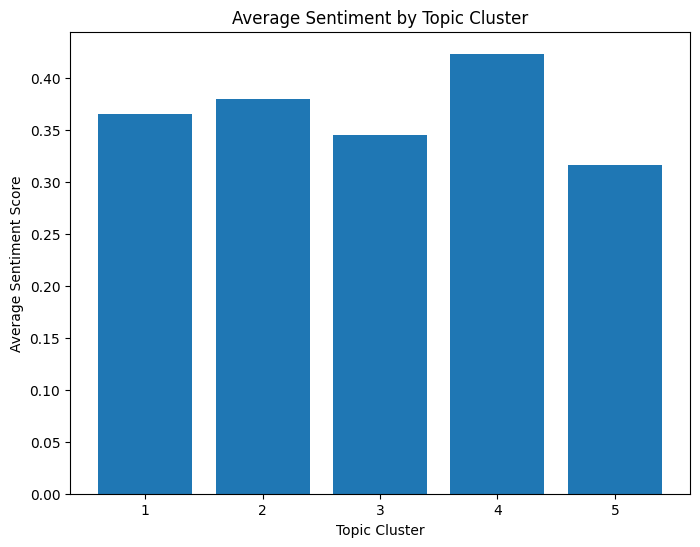

Topic 1:
['stars', 'earbuds', 'perfect', 'excellent', 'great', 'battery', 'school', 'life', 'long', 'sound']
Topic 2:
['price', 'good', 'stars', 'great', 'works', 'buds', 'ear', 'bad', 'quality', 'better']
Topic 3:
['stars', 'headphones', 'work', 'love', 'best', 'awesome', 'amazing', 'good', 'bass', 'great']
Topic 4:
['great', 'stars', 'sound', 'quality', 'product', 'comfortable', 'value', 'headphones', 'good', 'money']
Topic 5:
['stars', 'nice', 'durable', 'buy', 'pretty', 'purchase', 'good', 'noise', 'great', 'mic']


In [ ]:
import numpy as np
# Create TF-IDF matrix based on the 'review' column of your DataFrame
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['review'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

# Calculate sentiment for each review
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['review'].apply(lambda review: sia.polarity_scores(review)['compound'])

# Assign topics to reviews using the updated tfidf_matrix
df['topic'] = lda.transform(tfidf_matrix).argmax(axis=1) + 1  # Add 1 to relabel

# Group reviews by topic and calculate average sentiment
topic_sentiments = df.groupby('topic')['sentiment'].mean()

# Create a bar chart to visualize sentiment distribution across topics
plt.figure(figsize=(8, 6))
plt.bar(topic_sentiments.index, topic_sentiments.values)
plt.title("Average Sentiment by Topic Cluster")
plt.xlabel("Topic Cluster")
plt.ylabel("Average Sentiment Score")
plt.xticks(np.arange(1, 6, 1))  # Set x-axis ticks to 1, 2, 3, 4, 5
plt.show()

# (Optional) Print top words for each topic to understand theme
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")  # Add 1 to the index when printing
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]
    print(top_words)

Insights: This combines topic modeling with sentiment analysis. First, it assigns topics to each review using LDA. Then, it calculates the average sentiment for each topic cluster, visualizing the sentiment distribution across the discovered themes.

Key Takeaways:

Brand Comparisons: These visualizations allows to compare brands based on customer feedback. You can identify which brands are excelling in certain areas and which might have areas for improvement.

Customer Preferences: It gains insights into what features customers value most and what they dislike about certain brands.

Strategic Action: The insights from this analysis can be used to inform marketing campaigns, product development, and customer support efforts to improve customer satisfaction and brand loyalty.

**Section 5: Conclusion**

Summary of Findings
EDA Findings:

**Sentiment Analysis:**

As it can be seen we have only a single 2 star rating, which shows that overall we have mainly positive feedback.

*   "Apple AirPods (2nd Generation)" is the highest rated ear buds with has 78 counts of 5 starts, followed by "Kids Headphones"and "Beats Studio3"
*   The most 3 stars rated was - Amazon Basics In Ear Wired Headphones, which results in neutral rated ear buds.
*   The Beats product is very good in terms of rating of the customers, but one 2 star review hindered their overall rating. The comparison of all brands we could see on a violint and boxplot charts and in sorted grouped value counts, where our product is third in temrs of 5 stars.

*Star Rating Distribution of "Avarage Sentiment Score By Product"* visualization is to compare the distribution of star ratings for different brands.

Insights:  

*   This bar chart displays the average sentiment score for each product.
*   You can see which models are receiving the most positive or negative reviews. Here could see that Kids Headphones are ahead that other brands.

**Overall Sentiment:**

*   Predominantly positive feedback for products, with an average sentiment score of 5 stars - 672, 4 - 303, 3- 24 and 2 - 1.
*   The Sentiment Analysis Summary based on the content column showed that we have around 91% positive, 5% neutral and 4% negative feedback.

**From the “Word Cloud of Description Text”**:

*    We could see bigger the words like earbud, headphone, great, use, good, ear, sound. The size of each word in the cloud corresponds to its frequency in the text. These word clouds are simple and effective for visualizing the most common terms in a dataset.
*   As we can see that main words in our item is great, good, use, sound, earbud, ear, which indicates that the product is highly rated and many people talk about how it sounds.

**Classify the reviews:**

into positive, negative, and neutral sentiments. Aggregate the sentiment scores to assess overall consumer sentiment.
•	Gave us sentiment_analysis_summary of:  'positive': 689, 'neutral': 261, 'negative': 48

**Classify the content:**
•	Gave us sentiment_analysis_summary of: 'positive': 910, 'neutral': 51, 'negative': 37

**•	Sentiment Analysis Summary in proportions:** {'positive': 0.9118236472945892, 'neutral': 0.05110220440881764, 'negative': 0.03707414829659319}

**Feature-Sentiment Heatmap:**


*   Insights: This heatmap will show you how different features relate to customer sentiment for each product. It can help you identify strengths and weaknesses of specific features across the product line.

**Topic Modeling with Sentiment Visualization:**

This combines topic modeling with sentiment analysis. First, it assigns topics to each review. Then, it calculates the average sentiment for each topic cluster, visualizing the sentiment distribution across the discovered themes.

1.   Topic 1:
['stars', 'earbuds', 'perfect', 'excellent', 'great', 'battery', 'school', 'life', 'long', 'sound']
2.   Topic 2:
['price', 'good', 'stars', 'great', 'works', 'buds', 'ear', 'bad', 'quality', 'better']
3.   Topic 3: ['stars', 'headphones', 'work', 'love', 'best', 'awesome', 'amazing', 'good', 'bass', 'great']
4.   Topic 4: ['great', 'stars', 'sound', 'quality', 'product', 'comfortable', 'value', 'headphones', 'good', 'money']
5.   Topic 5: ['stars', 'nice', 'durable', 'buy', 'pretty', 'purchase', 'good', 'noise', 'great', 'mic']

As we can see that many words are repeated, meaning that the majority of customers are looking for similar features across different brands.

**Key Takeaways:**


*   Brand Comparisons: These visualizations allows to compare brands based on customer feedback. You can identify which brands are excelling in certain areas and which might have areas for improvement.
*   Customer Preferences: It gains insights into what features customers value most and what they dislike about certain brands.
*  
Strategic Action: The insights from this analysis can be used to inform marketing campaigns, product development, and customer support efforts to improve customer satisfaction and brand loyalty.



**Combining visualizations and NLTK tools gave us the following insights:**

*   *Insights of Keyword Frequency Comparison Across Brands: *This bar chart visualizes the frequency of specific keywords across brands. We can see which brands are discussed most often in relation to specific features (e.g., Beats might have higher frequency of "bass" mentions).


**Lots of insights can be derived from Comparison of Feature Mentions Across Brands chart:**

*   Beats Focus: The "bass" bar for Beats is often very tall, indicating that bass performance is a key discussion point in Beats reviews. This aligns with Beats' marketing and brand reputation for strong bass.
*   Bose's Noise Cancellation: The "noise cancellation" bar for Bose might be significantly higher than other brands. This suggests that Bose is known for its noise cancellation technology, and customers frequently mention it.
*   Sound Quality is Universal: We are likely see the "sound" bar is generally high across most brands. This reflects that sound quality is a fundamental consideration for most customers.
*   Battery Life Importance: The "battery" bar often indicates that customers are concerned with battery life, and it may be important to many brands' customers.

*   Brand-Specific Strengths: Lookind for areas where a brand has a notably higher frequency of mentions for a specific feature. This suggests they've been successful in building a reputation for that feature.
*   Areas for Improvement: Conversely, observing brands where the frequency of mentions for a specific feature is lower. This might indicate areas where the brand needs to improve or focus more on marketing efforts.

**Sentiment-Enhanced Word Clouds gave us:**
This creates side-by-side word clouds for each brand, one for positive reviews and one for negative reviews. We can see the language associated with positive and negative sentiments, which can help understand what customers like and dislike about each brand.

**Extracting Pain Points:**
To identify common issues or complaints in customer reviews summarizing the negative aspects.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd # Import pandas

stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

def analyze_negative_reviews(reviews, threshold=-0.05):
    """Analyzes negative reviews and extracts pain points."""
    pain_points = {}
    for review in reviews:
        # Preprocess the review
        processed_review = " ".join([word.lower() for word in nltk.word_tokenize(review) if word.lower() not in stop_words])
        sentiment = sia.polarity_scores(processed_review)['compound']

        if sentiment < threshold:  # Adjust threshold if needed
            # Identify pain points using keywords or patterns
            for keyword in keywords:
                if keyword.lower() in processed_review:
                    if keyword in pain_points:
                        pain_points[keyword] += 1
                    else:
                        pain_points[keyword] = 1

    return pain_points

# Example keywords
keywords = ["sound", "bass", 'noise cancellation', "comfort", "battery", "connection", "microphone", "price", "fit", "build quality"]

# Load your data (replace with your actual data)
df = pd.read_csv('merged_data - Copy.csv')

# Assuming you have a 'content' column in your DataFrame, replace 'content' with the actual column name if different
#  If not, you'll need to calculate sentiment scores for each review
# The following line was removed as 'text' was not defined and the line appears unnecessary:
# text = str(text.encode("utf-8"))
df['sentiment'] = df['content'].astype(str).apply(lambda review: sia.polarity_scores(review)['compound'])

# Filter reviews with negative sentiment
negative_reviews = df[df['sentiment'] < -0.05]['content'].tolist()  # Adjust threshold if needed

# Create the prompt with negative reviews
prompt = "Analyze the following negative reviews and summarize the key pain points:\n\n" + "\n\n".join(negative_reviews)

# Create the prompt with negative reviews
prompt = "Analyze the following negative reviews and summarize the key pain points:\n\n" + "\n\n".join(negative_reviews)

pain_points = analyze_negative_reviews(negative_reviews)

print("Key Pain Points:")
for pain_point, count in pain_points.items():
    print(f"- {pain_point}: {count} mentions")

# Short paragraph summarization
print("\nSummary:")
print(f"Based on negative customer reviews, common pain points include {', '.join(pain_points.keys())}. These issues suggest areas for improvement in product design, features, or communication.")

Key Pain Points:
- battery: 4 mentions
- price: 6 mentions
- sound: 13 mentions
- comfort: 2 mentions
- connection: 2 mentions
- fit: 3 mentions
- bass: 1 mentions
- microphone: 1 mentions

Summary:
Based on negative customer reviews, common pain points include battery, price, sound, comfort, connection, fit, bass, microphone. These issues suggest areas for improvement in product design, features, or communication.


**Extracting Positive Aspects:**
A prompt to highlight the positive features mentioned in the reviews.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

def analyze_positive_reviews(reviews, threshold=0.05):
    """Analyzes positive reviews and extracts key positive aspects."""
    positive_aspects = {}
    for review in reviews:
        # Preprocess the review
        processed_review = " ".join([word.lower() for word in nltk.word_tokenize(review) if word.lower() not in stop_words])
        sentiment = sia.polarity_scores(processed_review)['compound']

        if sentiment > threshold:  # Adjust threshold if needed
            # Identify positive aspects using keywords or patterns
            for keyword in keywords:
                if keyword.lower() in processed_review:
                    if keyword in positive_aspects:
                        positive_aspects[keyword] += 1
                    else:
                        positive_aspects[keyword] = 1

    return positive_aspects

# Example keywords
keywords = ["sound", "bass", 'noise cancellation', "comfort", "battery", "connection", "microphone", "price", "fit", "build quality"]

# Load your data (replace with your actual data)
df = pd.read_csv('merged_data - Copy.csv')


# Create the prompt with positive reviews
prompt = "Analyze the following positive reviews and summarize the key positive aspects:\n\n" + "\n\n".join(positive_reviews)

positive_aspects = analyze_positive_reviews(positive_reviews)

print("Key Positive Aspects:")
for aspect, count in positive_aspects.items():
    print(f"- {aspect}: {count} mentions")

# Short paragraph summarization
print("\nSummary:")
print(f"Based on positive customer reviews, key strengths include {', '.join(positive_aspects.keys())}. These aspects highlight a focus on quality audio, convenience, and user experience. ")

Key Positive Aspects:
- price: 14 mentions
- sound: 16 mentions
- fit: 7 mentions
- comfort: 2 mentions
- connection: 1 mentions
- battery: 2 mentions

Summary:
Based on positive customer reviews, key strengths include price, sound, fit, comfort, connection, battery. These aspects highlight a focus on quality audio, convenience, and user experience. 


**Finding Specific Examples:**
To find specific comments that mention particular features or issues mentioning about the battery life.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd  # Import pandas

stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

def analyze_negative_reviews(reviews, threshold=-0.05):
    """Analyzes negative reviews and extracts pain points."""
    pain_points = {}
    for review in reviews:
        # Preprocess the review
        processed_review = " ".join([word.lower() for word in nltk.word_tokenize(review) if word.lower() not in stop_words])
        sentiment = sia.polarity_scores(processed_review)['compound']

        if sentiment < threshold:  # Adjust threshold if needed
            # Identify pain points using keywords or patterns
            for keyword in keywords:
                if keyword.lower() in processed_review:
                    if keyword in pain_points:
                        pain_points[keyword] += 1
                    else:
                        pain_points[keyword] = 1

    return pain_points

# Example keywords
keywords = ["battery"]

# Load your data (replace with your actual data)
df = pd.read_csv('merged_data - Copy.csv')

# Assuming you have a 'content' column in your DataFrame, replace 'content' with the actual column name if different
#  If not, you'll need to calculate sentiment scores for each review
# The following line was removed as 'text' was not defined and the line appears unnecessary:
# text = str(text.encode("utf-8"))
df['sentiment'] = df['content'].astype(str).apply(lambda review: sia.polarity_scores(review)['compound'])

# Filter reviews with negative sentiment
negative_reviews = df[df['sentiment'] < -0.05]['content'].tolist()  # Adjust threshold if needed

# Create the prompt with negative reviews
prompt = "Analyze the following negative reviews and summarize the key pain points:\n\n" + "\n\n".join(negative_reviews)

pain_points = analyze_negative_reviews(negative_reviews)

print("Key Pain Points:")
for pain_point, count in pain_points.items():
    print(f"- {pain_point}: {count} mentions")

# Short paragraph summarization
print("\nSummary:")
print(f"Based on negative customer reviews, common pain points include {', '.join(pain_points.keys())}. These issues suggest areas for improvement in product design, features, or communication.")

# ... (rest of the code)

#  Positive review analysis
def analyze_positive_reviews(reviews, threshold=0.05):
    """Analyzes positive reviews and extracts key positive aspects."""
    positive_aspects = {}
    for review in reviews:
        # Preprocess the review
        processed_review = " ".join([word.lower() for word in nltk.word_tokenize(review) if word.lower() not in stop_words])
        sentiment = sia.polarity_scores(processed_review)['compound']

        if sentiment > threshold:  # Adjust threshold if needed
            # Identify positive aspects using keywords or patterns
            for keyword in keywords:
                if keyword.lower() in processed_review:
                    if keyword in positive_aspects:
                        positive_aspects[keyword] += 1
                    else:
                        positive_aspects[keyword] = 1

    return positive_aspects

# Example keywords
keywords = ["battery"]

# Load your data (replace with your actual data)
df = pd.read_csv('merged_data - Copy.csv')


# Create the prompt with positive reviews
prompt = "Analyze the following positive reviews and summarize the key positive aspects:\n\n" + "\n\n".join(positive_reviews)

positive_aspects = analyze_positive_reviews(positive_reviews)

print("Negative Customer Reviews on a battery:")
for aspect, count in positive_aspects.items():
    print(f"- {aspect}: {count} mentions")

# Short paragraph summarization
print("\nSummary:")
print(f"Based on positive customer reviews, key strengths include {', '.join(positive_aspects.keys())}. These aspects highlight a focus on quality audio, convenience, and user experience. ")

# Print battery mentions from both positive and negative reviews
print("\nBattery Mentions (Combined):")
print(f"Battery: {pain_points.get('battery', 0) + positive_aspects.get('battery', 0)} mentions")

Key Pain Points:
- battery: 4 mentions

Summary:
Based on negative customer reviews, common pain points include battery. These issues suggest areas for improvement in product design, features, or communication.
Negative Customer Reviews on a battery:
- battery: 2 mentions

Summary:
Based on positive customer reviews, key strengths include battery. These aspects highlight a focus on quality audio, convenience, and user experience. 

Battery Mentions (Combined):
Battery: 6 mentions


In [ ]:
# Print the specific mentions about battery
print("\nBattery Mentions (Negative):")
for review in negative_reviews:
    if "battery" in review.lower():
        print(f"- {review.strip()}")

# Short paragraph summarization
print("\nSummary:")
print(f"Based on negative customer reviews, common pain points include {', '.join(pain_points.keys())}. These issues suggest areas for improvement in product design, features, or communication.")

# Example keywords
keywords = ["battery"]

# Load your data (replace with your actual data)
df = pd.read_csv('merged_data - Copy.csv')

# Create the prompt with positive reviews
prompt = "Analyze the following positive reviews and summarize the key positive aspects:\n\n" + "\n\n".join(positive_reviews)

positive_aspects = analyze_positive_reviews(positive_reviews)

print("Key Positive Aspects:")
for aspect, count in positive_aspects.items():
    print(f"- {aspect}: {count} mentions")

# Print the specific mentions about battery
print("\nBattery Mentions (Positive):")
for review in positive_reviews:
    if "battery" in review.lower():
        print(f"- {review.strip()}")

# Short paragraph summarization
print("\nSummary:")
print(f"Based on positive customer reviews, key strengths include {', '.join(positive_aspects.keys())}. These aspects highlight a focus on quality audio, convenience, and user experience. ")

# Print battery mentions from both positive and negative reviews
print("\nBattery Mentions (Combined):")
print(f"Battery: {pain_points.get('battery', 0) + positive_aspects.get('battery', 0)} mentions")


Battery Mentions (Negative):
- The product description: it’s all true, but the battery life statement is a little misleading. The pods last a few hours before you have to put them back in the charging case. I have a mac, an iphone, and an ipad. It switches seamlessly between the ipad and iphone, but I sometimes have to manually connect to the mac. For some reason it doesn’t work with the Zoom app on my mac. Still it’s way better than any other blue tooth audio device I’ve ever encountered. I regret having bought inferior air buds previously.
- Bought these as a replacement for the AirPods I bought a few years ago. The charging case on these is quicker to notify me of low battery status… planned obsolescence? Having to make the product lower quality so we’re more inclined to buy the newer model? I’m satisfied enough with them for the price and am not willing to pay the higher cost for the newer models.
- They were easy to set up and the battery lasts a long time. My son runs around all